# Análise de sentimento: prática
Este notebook é parte da documentação de uma exploração de dados realizada para o artigo _**O uso da Cloroquina no tratamento da Covid-19 debatido no Facebook**: um estudo em opinião pública com processamento de linguagem natural_.

Para calcular o sentimento, o TextBlob calcula _polaridade_ e _subjetividade_ tirando uma média dos valores atribuídos aos termos usados no texto analisado. [Neste link](https://planspace.org/20150607-textblob_sentiment/) tem uma explicação de como isso funciona por debaixo dos panos. Esse tipo de abordagem é chamada de _rule-based_, que é uma técnica _knowledge-based_: ou seja, é baseada em regras construídas a partir de corpus de texto tageados por humanos; não é uma forma muito sofisticada, mas é um bom começo.

Existem abordagens estatísticas desse problema também. Uma dessas é o classificador [Naive-Bayes](https://www.ic.unicamp.br/~rocha/teaching/2011s2/mc906/aulas/naive-bayes-classifier.pdf), uma técnica relativamente simples que usa estatística Bayesiana para calcular a probabilidade de uma dada entidade pertencer a uma certa categoria a partir de seus aspectos. Esse método usa aprendizagem de máquina para treinar o modelo. O TextBlob tem uma [implementação](https://textblob.readthedocs.io/en/dev/classifiers.html) dele, e [aqui](https://www.kaggle.com/leandrodoze/sentiment-analysis-in-portuguese) há um exemplo dessa implementação usando o [SciKit Learn](https://scikit-learn.org/stable/).


## Importando e lendo os dados
Começando pelo mais fácil.

In [1]:
# montando o Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Caminho dos arquivos
!ls '/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/conteúdo'

content1.csv  content3.csv  content5.csv  content7.csv
content2.csv  content4.csv  content6.csv


In [5]:
# lendo os dados
data1 = open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/conteúdo/content1.csv')
data1 = data1.read()

## Nossa língua portuguesa
Por mais que o TextBlob "esteja nos ombros de gigantes" como o [NLTK](https://www.nltk.org/), eles não parecem detectar nem analisar língua portuguesa tão de boas assim por padrão não.

In [6]:
# em português = Sentiment(polarity=0.0, subjectivity=0.0)
from textblob import TextBlob

t = TextBlob("eu estou tão triste")
t.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [9]:
# em inglês = Sentiment(polarity=-0.5, subjectivity=1.0)
u = TextBlob("i am so sad")
u.sentiment

Sentiment(polarity=-0.5, subjectivity=1.0)

In [10]:
# no entanto, ele parece saber com o que está lidando
t.detect_language()

'pt'

Abaixo, uma tentativa de levantar o sentimento de cada comentário de um dos datasets. Apenas uma ou outra palavra parece ser identificada e avaliada, provavelmente aquelas com origem e radical comum a palavras da língua inglesa.

In [7]:
# importando NLTK e o punkt
import nltk
nltk.download('punkt')

teste1 = TextBlob(data1)

# essa função pega o dataset e exibe sentimento linha a linha. Ou pelo menos tenta. :-/
def sent(data):
  for sentence in data.sentences:
    print(sentence.sentiment, '==>', sentence)

sent(teste1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Sentiment(polarity=0.0, subjectivity=0.0) ==> Conteúdo
Os casos eram graves ?
Sentiment(polarity=0.0, subjectivity=0.0) ==> Estavam com respiradores?
Sentiment(polarity=0.0, subjectivity=0.0) ==> Ac
Somente casos graves estão usando cloroquina
Up
Glória à Deus!
Sentiment(polarity=0.0, subjectivity=0.0) ==> Ac
Gloria a Deus ❤️

Deus e maravilho
Amém
Amém!!!
Sentiment(polarity=0.0, subjectivity=0.0) ==> Que continue dando certo a todos
Tomara
Isso não é nem perto de ser a solução
Para de pensar negativo.
Sentiment(polarity=0.0, subjectivity=0.0) ==> Por isso que o brasil nao vai pra frente
Amém 🙏
Deve ser Feike!
Sentiment(polarity=0.0, subjectivity=0.0) ==> 1
Não é.
Sentiment(polarity=0.0, subjectivity=0.0) ==> 75 anos, estava em estado grave e já tinha até se despedido da família.
Sentiment(polarity=-0.5, subjectivity=1.0) ==> https://www.uol.com.br/vivabem/noticias/redacao/202

## Analisadores estatísticos
É por causa disso que os modelos estatísticos talvez sejam uma solução melhor pro nosso problema do que simplesmente desistir da pesquisa por não termos recursos em língua portuguesa. Notável a diferença entre os resultados de ambos os analisadores, um deles o padrão do TextBlob e o outro usando o algoritmo Naive-Bayes.

In [8]:
# a ferramenta crua, sem nenhum parâmetro: Sentiment(polarity=-0.30575317614006275, subjectivity=0.6938446969696971)
teste1.sentiment

Sentiment(polarity=-0.30575317614006275, subjectivity=0.6938446969696971)

In [9]:
# usando o analisador Naive Bayes do NLTK
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')

from textblob.sentiments import NaiveBayesAnalyzer

teste1 = TextBlob(data1, analyzer=NaiveBayesAnalyzer())
teste1.sentiment

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Sentiment(classification='pos', p_pos=0.9999978271912772, p_neg=2.1728087504764657e-06)

Os exemplos citados logo mais mostram como a atuação desse analisador é um pouco questionável, pelo menos nessa implementação específica. As palavras "odeio" e "imbecis" não fizeram nem cócegas no resultado da avaliação, positiva. Enquanto isso, um outro comentário cheio de palavras de conotação negativa, mas classificado manualmente como neutro, tem alta polaridade positiva na avaliação de sentimento:

```
Sentiment(classification='pos', p_pos=0.833333333333333, p_neg=0.16666666666666646) ==> Odeio tanto os adoradores do Luladrão como os imbecis como vc, que não ouvem as autoridades médicas, os infectologistas e sim o Bozo tresloucado!!
Sentiment(classification='pos', p_pos=0.9166666666666673, p_neg=0.08333333333333334) ==> Das pessoas infectadas, cerca de 20% precisam de hospitalização, 5% dos casos são críticos e precisam de UTI e suporte respiratório, e cerca de metade dos casos críticos vêm a óbito.
```

Observando os seus resultados, não sei se dá pra dizer qual deles foi melhor porque ambos parecem ter se saído meio mal quando a gente analisa linha a linha. Uma das dependências que esse analisador usa para funcionar é um _corpus_ de avaliação de filmes, provavelmente também em língua inglesa. Talvez seja uma boa ideia criar nosso próprio classificador.

In [10]:
# agora, linha a linha
teste1 = TextBlob(data1, analyzer=NaiveBayesAnalyzer())

# essa função pega o dataset e exibe sentimento linha a linha. Ou pelo menos tenta. :-/
def sent(data):
  for sentence in data.sentences:
    print(sentence.sentiment, '==>', sentence)

sent(teste1)

Sentiment(classification='pos', p_pos=0.5, p_neg=0.5) ==> Conteúdo
Os casos eram graves ?
Sentiment(classification='pos', p_pos=0.5, p_neg=0.5) ==> Estavam com respiradores?
Sentiment(classification='neg', p_pos=0.3749999999999995, p_neg=0.6249999999999998) ==> Ac
Somente casos graves estão usando cloroquina
Up
Glória à Deus!
Sentiment(classification='pos', p_pos=0.5357142857142863, p_neg=0.46428571428571397) ==> Ac
Gloria a Deus ❤️

Deus e maravilho
Amém
Amém!!!
Sentiment(classification='pos', p_pos=0.5078125, p_neg=0.4921875000000001) ==> Que continue dando certo a todos
Tomara
Isso não é nem perto de ser a solução
Para de pensar negativo.
Sentiment(classification='pos', p_pos=0.5, p_neg=0.5) ==> Por isso que o brasil nao vai pra frente
Amém 🙏
Deve ser Feike!
Sentiment(classification='pos', p_pos=0.5, p_neg=0.5) ==> 1
Não é.
Sentiment(classification='neg', p_pos=0.48214285714285715, p_neg=0.5178571428571429) ==> 75 anos, estava em estado grave e já tinha até se despedido da família.


### Sentimento e posicionamento
Como eu meio que já previa isso, criei [uma versão anotada](https://docs.google.com/spreadsheets/d/1e6F5_esHtzdHgX14eGED8o1Rh_mUt_59Vohz9hYbQaE/edit#gid=1791126449) dos datasets, que classifica cada manifestação dos usuários em _positivo_ (a favor do uso da cloroquina no tratamento da Covid-19), _negativo_ (contra o uso da cloroquina) ou _neutro_ numa coluna chamada **Posicionamento** (_stance_). Essa anotação foi feita de modo manual, lendo comentário por comentário e atribuindo-lhe uma classificação — [neste artigo](https://arxiv.org/pdf/1605.01655.pdf), Mohammad et al. (2016) expõe uma metodologia completa para isso, que envolve um time numeroso de pesquisadores-anotadores que validam entre si as suas marcações. Alguns desses comentários expressavam concordância com o uso da cloroquina apenas em alguns casos (mais graves, ou no início da infecção pela doença); esses comentários foram classificados como _positivos_ por estarem de acordo com o uso do medicamento no tratamento dessa enfermidade, ainda que de maneira contida. 

Também fiz uma versão do primeiro dataset anotada manualmente com o **sentimento** (_positivo_, _negativo_ ou _neutro_) predominante de cada texto, que acabou não sendo usada. Um dos motivos é a dificuldade de se atribuir valores a sentimentos sem uma metodologia de rotulagem específica para isso nem uma equipe de pesquisadores para auxiliar e validar o processo; inferir e rotular posicionamento em um contexto como este é muito mais simples que inferir sentimento e atribuir a ele uma valência. Posicionamento é diferente de sentimento, ainda que possam estar relacionados. A análise de sentimento busca as relações positivas e negativas na linguagem dos usuários, enquanto que análises que buscam inferir posicionamentos buscam a opinião dos usuários sobre um dado tema.

## Naive Bayes e TextBlob
O Naive Bayes é uma fórmula de _cálculo probabilístico_, uma quantificação de um processo lógico. Seu objetivo é encontrar a probabilidade entre duas relações, corrigindo essa probabilidade quando alimentado com dados novos. Aqui, ele é treinado com dados rotulados e depois o modelo é testado para avaliar sua acurácia. Em teoria, quanto mais alimentado o modelo, melhor ele aprende.

In [11]:
# importando classificadores
from textblob.classifiers import NaiveBayesClassifier
import csv

# importando os dados diretamente em forma de tuplas
with open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/sentimento/posicionamento7-treino.csv', newline='') as f1:
  treino = [tuple(row) for row in csv.reader(f1)]

with open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/sentimento/posicionamento7-teste.csv', newline='') as f2:
  teste = [tuple(row) for row in csv.reader(f2)]

cl = NaiveBayesClassifier(treino)
cl.update(teste)
cl.accuracy(teste)

0.8347826086956521

Aparentemente, tudo está funcionando e o classificador retorna uma acurácia alta. Porém, ainda que o Naive-Bayes seja um bom classificador, apropriado para uma série de tarefas que incluem identificar emails que são spams ou detectar linguagem imprópria em fóruns de discussão, ele não é um bom estimador. Além disso, há dúvidas se a classificação dele realmente funciona direitinho, porque quando esse modelo é alimentado com novos dados, a capacidade de identificar padrões se reduz drasticamente, vide abaixo.

In [25]:
# importando os dados diretamente em forma de tuplas, exatamente como da outra vez
with open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/sentimento/posicionamento1-treino.csv', newline='') as f1: treino1 = [tuple(row) for row in csv.reader(f1)]
with open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/sentimento/posicionamento1-teste.csv', newline='') as f1: teste1 = [tuple(row) for row in csv.reader(f1)]

with open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/sentimento/posicionamento2-treino.csv', newline='') as f1: treino2 = [tuple(row) for row in csv.reader(f1)]
with open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/sentimento/posicionamento2-teste.csv', newline='') as f1: teste2 = [tuple(row) for row in csv.reader(f1)]

with open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/sentimento/posicionamento3-treino.csv', newline='') as f1: treino3 = [tuple(row) for row in csv.reader(f1)]
with open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/sentimento/posicionamento3-teste.csv', newline='') as f1: teste3 = [tuple(row) for row in csv.reader(f1)]

with open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/sentimento/posicionamento4-treino.csv', newline='') as f1: treino4 = [tuple(row) for row in csv.reader(f1)]
with open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/sentimento/posicionamento4-teste.csv', newline='') as f1: teste4 = [tuple(row) for row in csv.reader(f1)]

with open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/sentimento/posicionamento5-treino.csv', newline='') as f1: treino5 = [tuple(row) for row in csv.reader(f1)]
with open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/sentimento/posicionamento5-teste.csv', newline='') as f1: teste5 = [tuple(row) for row in csv.reader(f1)]

with open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/sentimento/posicionamento6-treino.csv', newline='') as f1: treino6 = [tuple(row) for row in csv.reader(f1)]
with open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/sentimento/posicionamento6-teste.csv', newline='') as f1: teste6 = [tuple(row) for row in csv.reader(f1)]

with open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/sentimento/posicionamento7-treino.csv', newline='') as f1: treino7 = [tuple(row) for row in csv.reader(f1)]
with open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/sentimento/posicionamento7-teste.csv', newline='') as f1: teste7 = [tuple(row) for row in csv.reader(f1)]

In [27]:
# Criando e treinando o classificador
myClassifier = NaiveBayesClassifier(treino1)
myClassifier.update(treino2)
myClassifier.update(treino3)
myClassifier.update(treino4)
myClassifier.update(treino5)
myClassifier.update(treino6)
myClassifier.update(treino7)

True

Vixe, pior que tacar uma moeda pra cima e chutar o resultado! 😬

In [28]:
# acurácia pior que a de um ser humano!
print(myClassifier.accuracy(teste1))
print(myClassifier.accuracy(teste2))
print(myClassifier.accuracy(teste3))
print(myClassifier.accuracy(teste4))
print(myClassifier.accuracy(teste5))
print(myClassifier.accuracy(teste6))
print(myClassifier.accuracy(teste7))

0.47115384615384615
0.5244755244755245
0.33695652173913043
0.47058823529411764
0.3443708609271523
0.43089430894308944
0.3652173913043478


In [29]:
# alguns dos aspectos informativos parecem fazer sentido, mas não todos
myClassifier.show_informative_features(20)

Most Informative Features
      contains(eficácia) = True           Negati : Neutro =     12.3 : 1.0
             contains(🙏) = True           Positi : Neutro =     11.5 : 1.0
      contains(hospital) = True           Positi : Negati =      9.7 : 1.0
       contains(ciência) = True           Negati : Positi =      9.4 : 1.0
        contains(errado) = True           Negati : Neutro =      9.3 : 1.0
            contains(dá) = True           Negati : Neutro =      9.3 : 1.0
           contains(EUA) = True           Negati : Positi =      8.7 : 1.0
        contains(idiota) = True           Negati : Positi =      7.9 : 1.0
         contains(Trump) = True           Negati : Neutro =      7.8 : 1.0
       contains(malária) = True           Positi : Neutro =      7.6 : 1.0
      contains(sintomas) = True           Neutro : Negati =      7.5 : 1.0
     contains(protocolo) = True           Positi : Negati =      7.4 : 1.0
    contains(científica) = True           Negati : Positi =      7.2 : 1.0

Como aqui ele não está fazendo nenhuma análise de estrutura das informações, tem como entrada informações muito caóticas e pouco estruturadas, e não existe o auxílio dos corpos léxicos anotados, fica difícil confiar na precisão desse modelo. Abaixo, a probabilidade de nosso modelo treinado classificar a frase de exemplo como positiva, negativa ou neutra.

In [30]:
# enfim, ainda tenho minhas dúvidas
myClassifier.prob_classify('Você sabe que deveria consultar um médico antes de tomar a cloroquina, né?').prob('Positivo')

0.8610267590853651

## Naive Bayes e SciKit Learn
O modelo abaixo usa a mesma lógica de aprendizagem de máquina que as tentativas nos blocos anteriores, e é baseado [neste experimento](https://www.kaggle.com/leandrodoze/sentiment-analysis-in-portuguese). Ele faz uso de algumas das bibliotecas que usamos aqui, mas seus resultados também não são muito melhores. Mais adiante discutiremos o porquê e as possíveis soluções para experimentos futuros. O SciKit Learn, ferramenta de tratamento estatístico e aprendizagem de máquina que vamos usar nessa implementação, tem [módulos](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) bastante interessantes para lidar com texto que precisam ser melhor explorados no futuro.

### Construindo o modelo
Aqui, vamos separar o conteúdo de seu rótulo classificatório para que possamos enfim criar a bag-of-words — que cria vetores para cada palavra conforme sua frequência de uso — para depois aplicar o Naive Bayes.

In [32]:
# o caminhão de bibliotecas e módulos usados aqui
import nltk, re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

# conteúdo e posicionamentos em variáveis separadas
treino = pd.read_csv('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/sentimento/posicionamento1-treino.csv', encoding='utf-8')

content = treino['content'].values
stance = treino['stance'].values

# tentando uma implementação com as stopwords identificadas anteriormente
# a linha comentada abaixo é uma implementação do vetorizador considerando unigramas e bigramas: não deu muito bom
# vectorizador = CountVectorizer(ngram_range = (1, 2))
vectorizador = CountVectorizer(analyzer = "word", stop_words=('a1-tomando-hidroxicloroquina/a-53490069', 'maca=pt-br-facebook-sharing', '…ver', '21.05.2020', 'el', 'la', '1a', 'id=111037913835511', 'story_fbid=142404497365519', 'angu…ver', 'cartacapital.com.br', '83', '0:08', '‎‎9', 'rfi', '2:15', '‎11:13', 'مه', '79', 'dp', '6:20', '0:29', '05/06/2020', 'A1rmaco-contra-la-malaria-para-combatir-el-coronavirus/a-53525047', '28x', '55', 'pessoa…ver', 'salvado…ver', 'rebanho…ver', 'revistagalileu.globo.com', '22:45', '000', '2comentários', '2:33', '5x', '×', 'messeng…ver', '23:19', 'usoalideatdatr.coacmacegamos', 'rob…ver', 'derivados.…ver', '35.000', 'nã…ver', 'n', '1,5', 'cr', '90.000', '19', 'td', 'veja.abril.com.br', '90', 'not', '7:12', '20_05_2020', 'consultaremedios.com.br', 'id=636938300054720', 'story_fbid=1019342698480943', 'b', '25a3o-de-casos-de-covid-19-1.424102', '25ADcias/geral/eua-passa-de-90-000-mortes-e-1-5-milh%25C3%25A3o-de-casos-de-covid-19-1.424102%3famp=1', 'correiodopovo.com.br', 'ciencia.estadao.com.br', 'utm_medium=link', '3afacebook', '30', '6', 'utm_source=estadao', 'it', 'id=100003639170871', 'story_fbid=1870871703044117', 'http://www.gazetadopovo.com.br/republica/breves/coronavirus-sociedade-brasileira-imunologia-cloroquina', 'gazetadopovo.com.br', 'dailymail.co.uk', '1…ver', '14', '508', 'w', '400', 'c3', 'v=uijcuwvardy', 'entã…ver', '16', '96000', 'https://www.medrxiv.org/content/10.1101/2020.04.07.20056424v2', 'feature=youtu.be', 'v=vmdyiiidml8', '68', '08', 'media1.tenor.co', 'necessit…ver', 'giphy', 'es', 'unicamp.br', 't', 'id=100000982583520', 'story_fbid=3937748652934515', 'www1.folha.uol.com.br', 'correiobraziliense.com.br', 'maca=pt-br-facebook-sharing', '12:53', '94', '99', 'l…ver', 'lamarque/reuters', '1.000', 'd3', 'g1.globo.com', 'a1-tomando-hidroxicloroquina/a-53490069', '70', '01:29', '01:30', '8', 'n', '11', 'fbclid=IwAR00ntGTutiH3TOgQA18xBFpHmMnMKQ4CeGORpPYRwnYqe4-z-7sBACkS4w', 'v=imyfz7ri8vc', 'v=zer6omw0vnu', '2002', 'v=wa2om70v66o', 'x', 'ufpr.br', '11.°', '14', 'luciliadiniz.com', '11:56', '348', '428', 'ea', '15', 'médicosrevistacrescer.globo.com', 'pel…', 'saude.estadao.com.br', 'qq', 'di…ver', 'di…ver', 'vi…ver', '67', 'infart…ver', 'acredita…ver	', 'q…ver', 'a…ver', 'chat.whatsapp.com', '500mg', '450', '90', '200mg', 'e…ver', '30', 'n9', 'ñ', 'c', 'tb', '30', 'i', '07/04', '24', 'and', 'so', '’', '‘', '500', 'at', 'id=100031212156711', 'story_fbid=241150380268699', '03', '13/03/2020', '2/2', '25876', '01441', '2000', '5.000', 'the', '23:11', 'www.google.com', '21:35', 'ii', 'mg/kg', 'qd', '’', 'so', 'c', 'est', '»', 'noticias.r7.com', 'he', '19', 'www1.folha.uol.com.br', '23:22', '24', 'bloomberg.com', 'co…', 'google.com', 'to', 'is', 'it', 'oh', '川', '5:27', 'neh', 'brasil.elpais.com	', 'afff', '3foutputtype=amp', '36', '90', '400', 'c', '🥱', 'tô', 'mi', 'rs', 'correiobraziliense.com.br', 'r', 'agr', 'ô', '819', 'pre', '19', 'uai', '14', 'so', 'twitch.tv', '13', '2003', 'afz', 'hein', '35', 'media1.tenor.co', 'á', 'giphy', 'g1.globo.com', 'b382022', '2,5', '18.000.00', 'epoca.globo.com', 'veja.abril.com.br', 'id=100002238746462', 'story_fbid=3034985226586072', 'ê', 'o', 'aff', '39', '16', 'brakkkkkkkkkkkk', 'k', 'afffff', '8', '5,3', '15', '7.599', '3.120', 'gb', '64', '11', '16,5', '400', 'n', '18', 'ueh', '900', 'amp=1', '2o', 'bvsms.saude.gov.br/bvs/sus/comissoes.php', 'bvsms.saude.gov.br', 'http', 'usg=aovvaw2rb7swa3zpjklxt9uikurm', 'ved=2ahukewjslo6_7nlqahxvqd8khyh1dz0qfjahegqibrac', 'url=https', 'url=https', 'rct=j', 'source=web', 'sa=t', 'g', '25', 'नपूण‎', 'د', 'https://www.correiobraziliense.com.br/app/noticia/politica/2020/07/16/interna_politica,872688/amp.htm', 'muita', 'q', '2', '1', 'uol.com.br', 'om', 'apenas', 'antes', 'olha', 'assim', 'todo', 'twitch', 'pro', 'qualquer', 'gif', 'tenor', 'imagem', 'coisa', 'quanto', 'outros', 'algum', 'outra', 'ja', 'ainda', 'lá', 'vou', 'tão', 'falou', 'devem', 'podem', 'sinoussi', 'barré', 'françoise', 'tá', 'têm', 'pode', 'após', 'https', 'pois', 'uol', 'istoé', 'vai', 'toda', 'tudo', 'sim', 'bolsonarotemrazao', 'outro', 'onde', 'vez', 'pós', 'ter', 'vem', 'vão', 'google amp', 'né', 'tiraram', 'noticias', 'r7', 'eh', 'disse', 'algo', 'então', 'desse', 'dizer', 'quê', 'sendo', 'tbm', 'pra', 'aí', 'dessa', 'deve', 'sob', 'br', 'dar', 'dá', 'etc', 'ai', 'imagem pode', 'conter', 'cada', 'deu', 'vc', 'nao', 'aponta', 'pq', 'sobre', 'quer', 'ta', 'deixa', 'iwar0geexfnu6ezovclpbvw5x3z3yon5n1x6sido5p7ezuom_uwouu31rboay', 'fbclid=iwar2srohpl8geeqr8a9zyz17hpgmms4hh1q87ffficm_ek0v9srs5lgqsn68', '“', '”', 'p', '-', '…', '3', 'm', 'oglobo.globo.com', '10', '75', 'x', 'youtube.com', '20/03', '25/03', '26/03/2020', 's', '40', '60', '—', '460.361', '100', '100.000', 'istoe.com.br', '5', 'oq', '1.527.536', '122.025.818', '6.206.514', '1.152.283', '187.799.806', '627.047', '120.836.850', '831.381', '3.496.359', 'imperial.ac.uk', '1,6', '212.559.409', 'f', '529.779', '15.432', '72.398', '57.423', 'otempo.com.br', '206.087', '49.599.016', '4', '702.497', '250.182', '44.212', '11.457.197', '97.044', 'e/ou', 'noticias.uol.com.br', 'gizmodo.uol.com.br', '1.182.457', '0,2', '7', '니', 'usp=drivesdk', 'drive.google.com', '80', '20', 'clo2', '14x', '0:02', '0:00', 'ப', 'h', '4e', 'cmpid=copiaecola', '18:46', 'd', '27/03', '12h', 'av', 'ah', '²', '12', 'covidvisualizer.com', '17:30', '1,2kb/s', '19:34', 'è', '口', '444', 'u', '24/03/20', '08h38', '520', '09:50'))
freqTrain = vectorizador.fit_transform(content)

# treinando o modelo
modelo = MultinomialNB()
modelo.fit(freqTrain, stance)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['00', '01', '016', '02', '025', '04', '044', '047', '05', '06', '07', '087', '09', '100000982583520', '100002238746462', '100003639170871', '100031212156711', '1019342698480943', '1101', '111037913835511', '120', '122', '142404497365519', '152', '17', '182', '187', '1870871703044117', '197', '20056424v2', '2020', '206', '21', '212', '22', '23', '241150380268699', '250', '25a3o', '25adcias', '25c3', '26', '27', '283', '29', '2ahukewjslo6_7nlqahxvqd8khyh1dz0qfjahegqibrac', '2kb', '3034985226586072', '33', '34', '359', '361', '381', '3937748652934515', '398', '3famp', '3foutputtype', '409', '423', '424102', '432', '44', '45', '457', '46', '460', '49', '496', '497', '50', '514', '527', '529', '53', '53490069', '53525047', '536', '559', '56', '57', '599', '627', '636938300054720', '702', '72', '77

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [33]:
# testando o modelo
teste = pd.read_csv('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/sentimento/posicionamento1-teste.csv',encoding='utf-8')

freqTeste = vectorizador.transform(teste)
modelo.predict(freqTeste)

array(['Positivo', 'Positivo'], dtype='<U8')

In [34]:
# validação do modelo dividindo a amostra em 10 partes (cv)
resultados = cross_val_predict(modelo, freqTrain, stance, cv = 10)

In [35]:
# acurácia desse modelo: 0.5391... usando n-gramas e 0.6173... sem eles.
metrics.accuracy_score(stance, resultados)

0.6173913043478261

In [36]:
# validação estatítica do modelo
posic = ["Positivo", "Negativo", "Neutro"]
print(metrics.classification_report(stance, resultados, posic))

              precision    recall  f1-score   support

    Positivo       0.67      0.80      0.73       135
    Negativo       0.00      0.00      0.00        22
      Neutro       0.53      0.47      0.50        73

    accuracy                           0.62       230
   macro avg       0.40      0.42      0.41       230
weighted avg       0.56      0.62      0.58       230



In [37]:
# matriz-confusão
print(pd.crosstab(stance, resultados, rownames = ["Real"], colnames=["Predito"], margins=True))

Predito   Negativo  Neutro  Positivo  All
Real                                     
Negativo         0       6        16   22
Neutro           1      34        38   73
Positivo         3      24       108  135
All              4      64       162  230


Essa implementação é um pouco mais sofisticada que a do sandbox anterior, mas ainda assim não trouxe uns resultados muito melhores não. Ambos os algoritmos performam pior que um ser humano nessa tarefa específica, e quando melhoram, é muito pouco. Isso porque, além de não ter como fazer uso das bases e corpos léxicos disponívels, os dados aqui são muito pouco estruturados, pouco homogêneos, caóticos mesmo.

## Bônus: nuvens de posicionamentos
Como temos todo o dataset anotado com as posições dos usuários a respeito do uso ou não da cloroquina no tratamento da Covid-19 e temos o _know-how_ todo prontinho para a construção de Wordclouds, não faz sentido deixar isso pra lá sem uso só porque o nosso experimento aqui deu ruim. Como vimos nos experimentos anteriores, visualizações simples como as nuvens de palavras podem ser bem interessantes.

In [38]:
# importando uma versão do dataset com todos os comentários de todas as thread aglutinados
pos = pd.read_csv('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/sentimento/tudo/posicionamento-tudo.csv',encoding='utf-8')

posNeg, posPos, posNeu = '', '', ''

for i in pos[pos.stance == 'Negativo'].content: posNeg = posNeg + i + ' '
for i in pos[pos.stance == 'Positivo'].content: posPos = posPos + i + ' '
for i in pos[pos.stance == 'Neutro'].content: posNeu = posNeu + i + ' '

In [39]:
# importando um caminhão de bibliotecas
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image

nltk.download('stopwords')
nltk.download('punkt')

links = []

# essa função gera uma lista com todas as palavras de cada thread e armazena os links encontrados no array "links"
def tokeniz(data):
  blob = TextBlob(data)
  palavras = blob.words.lower()

  j = 0
  for i in palavras:
    j = j + 1
    if i == "https":
      links.append(palavras[j])
      palavras.pop(j)

  return palavras

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [40]:
# separando as opiniões/posicionamentos
cloudNeg, cloudPos, cloudNeu = '', '', ''

for i in tokeniz(posNeg): cloudNeg = cloudNeg + i + ' '
for i in tokeniz(posPos): cloudPos = cloudPos + i + ' '
for i in tokeniz(posNeu): cloudNeu = cloudNeu + i + ' '

# conjunto das stopwords catadas à mão
stop = ['a1-tomando-hidroxicloroquina/a-53490069', 'maca=pt-br-facebook-sharing', '…ver', '21.05.2020', 'el', 'la', '1a', 'id=111037913835511', 'story_fbid=142404497365519', 'angu…ver', 'cartacapital.com.br', '83', '0:08', '‎‎9', 'rfi', '2:15', '‎11:13', 'مه', '79', 'dp', '6:20', '0:29', '05/06/2020', 'A1rmaco-contra-la-malaria-para-combatir-el-coronavirus/a-53525047', '28x', '55', 'pessoa…ver', 'salvado…ver', 'rebanho…ver', 'revistagalileu.globo.com', '22:45', '000', '2comentários', '2:33', '5x', '×', 'messeng…ver', '23:19', 'usoalideatdatr.coacmacegamos', 'rob…ver', 'derivados.…ver', '35.000', 'nã…ver', 'n', '1,5', 'cr', '90.000', '19', 'td', 'veja.abril.com.br', '90', 'not', '7:12', '20_05_2020', 'consultaremedios.com.br', 'id=636938300054720', 'story_fbid=1019342698480943', 'b', '25a3o-de-casos-de-covid-19-1.424102', '25ADcias/geral/eua-passa-de-90-000-mortes-e-1-5-milh%25C3%25A3o-de-casos-de-covid-19-1.424102%3famp=1', 'correiodopovo.com.br', 'ciencia.estadao.com.br', 'utm_medium=link', '3afacebook', '30', '6', 'utm_source=estadao', 'it', 'id=100003639170871', 'story_fbid=1870871703044117', 'http://www.gazetadopovo.com.br/republica/breves/coronavirus-sociedade-brasileira-imunologia-cloroquina', 'gazetadopovo.com.br', 'dailymail.co.uk', '1…ver', '14', '508', 'w', '400', 'c3', 'v=uijcuwvardy', 'entã…ver', '16', '96000', 'https://www.medrxiv.org/content/10.1101/2020.04.07.20056424v2', 'feature=youtu.be', 'v=vmdyiiidml8', '68', '08', 'media1.tenor.co', 'necessit…ver', 'giphy', 'es', 'unicamp.br', 't', 'id=100000982583520', 'story_fbid=3937748652934515', 'www1.folha.uol.com.br', 'correiobraziliense.com.br', 'maca=pt-br-facebook-sharing', '12:53', '94', '99', 'l…ver', 'lamarque/reuters', '1.000', 'd3', 'g1.globo.com', 'a1-tomando-hidroxicloroquina/a-53490069', '70', '01:29', '01:30', '8', 'n', '11', 'fbclid=IwAR00ntGTutiH3TOgQA18xBFpHmMnMKQ4CeGORpPYRwnYqe4-z-7sBACkS4w', 'v=imyfz7ri8vc', 'v=zer6omw0vnu', '2002', 'v=wa2om70v66o', 'x', 'ufpr.br', '11.°', '14', 'luciliadiniz.com', '11:56', '348', '428', 'ea', '15', 'médicosrevistacrescer.globo.com', 'pel…', 'saude.estadao.com.br', 'qq', 'di…ver', 'di…ver', 'vi…ver', '67', 'infart…ver', 'acredita…ver	', 'q…ver', 'a…ver', 'chat.whatsapp.com', '500mg', '450', '90', '200mg', 'e…ver', '30', 'n9', 'ñ', 'c', 'tb', '30', 'i', '07/04', '24', 'and', 'so', '’', '‘', '500', 'at', 'id=100031212156711', 'story_fbid=241150380268699', '03', '13/03/2020', '2/2', '25876', '01441', '2000', '5.000', 'the', '23:11', 'www.google.com', '21:35', 'ii', 'mg/kg', 'qd', '’', 'so', 'c', 'est', '»', 'noticias.r7.com', 'he', '19', 'www1.folha.uol.com.br', '23:22', '24', 'bloomberg.com', 'co…', 'google.com', 'to', 'is', 'it', 'oh', '川', '5:27', 'neh', 'brasil.elpais.com	', 'afff', '3foutputtype=amp', '36', '90', '400', 'c', '🥱', 'tô', 'mi', 'rs', 'correiobraziliense.com.br', 'r', 'agr', 'ô', '819', 'pre', '19', 'uai', '14', 'so', 'twitch.tv', '13', '2003', 'afz', 'hein', '35', 'media1.tenor.co', 'á', 'giphy', 'g1.globo.com', 'b382022', '2,5', '18.000.00', 'epoca.globo.com', 'veja.abril.com.br', 'id=100002238746462', 'story_fbid=3034985226586072', 'ê', 'o', 'aff', '39', '16', 'brakkkkkkkkkkkk', 'k', 'afffff', '8', '5,3', '15', '7.599', '3.120', 'gb', '64', '11', '16,5', '400', 'n', '18', 'ueh', '900', 'amp=1', '2o', 'bvsms.saude.gov.br/bvs/sus/comissoes.php', 'bvsms.saude.gov.br', 'http', 'usg=aovvaw2rb7swa3zpjklxt9uikurm', 'ved=2ahukewjslo6_7nlqahxvqd8khyh1dz0qfjahegqibrac', 'url=https', 'url=https', 'rct=j', 'source=web', 'sa=t', 'g', '25', 'नपूण‎', 'د', 'https://www.correiobraziliense.com.br/app/noticia/politica/2020/07/16/interna_politica,872688/amp.htm', 'muita', 'q', '2', '1', 'uol.com.br', 'om', 'apenas', 'antes', 'olha', 'assim', 'todo', 'twitch', 'pro', 'qualquer', 'gif', 'tenor', 'imagem', 'coisa', 'quanto', 'outros', 'algum', 'outra', 'ja', 'ainda', 'lá', 'vou', 'tão', 'falou', 'devem', 'podem', 'sinoussi', 'barré', 'françoise', 'tá', 'têm', 'pode', 'após', 'https', 'pois', 'uol', 'istoé', 'vai', 'toda', 'tudo', 'sim', 'bolsonarotemrazao', 'outro', 'onde', 'vez', 'pós', 'ter', 'vem', 'vão', 'google amp', 'né', 'tiraram', 'noticias', 'r7', 'eh', 'disse', 'algo', 'então', 'desse', 'dizer', 'quê', 'sendo', 'tbm', 'pra', 'aí', 'dessa', 'deve', 'sob', 'br', 'dar', 'dá', 'etc', 'ai', 'imagem pode', 'conter', 'cada', 'deu', 'vc', 'nao', 'aponta', 'pq', 'sobre', 'quer', 'ta', 'deixa', 'iwar0geexfnu6ezovclpbvw5x3z3yon5n1x6sido5p7ezuom_uwouu31rboay', 'fbclid=iwar2srohpl8geeqr8a9zyz17hpgmms4hh1q87ffficm_ek0v9srs5lgqsn68', '“', '”', 'p', '-', '…', '3', 'm', 'oglobo.globo.com', '10', '75', 'x', 'youtube.com', '20/03', '25/03', '26/03/2020', 's', '40', '60', '—', '460.361', '100', '100.000', 'istoe.com.br', '5', 'oq', '1.527.536', '122.025.818', '6.206.514', '1.152.283', '187.799.806', '627.047', '120.836.850', '831.381', '3.496.359', 'imperial.ac.uk', '1,6', '212.559.409', 'f', '529.779', '15.432', '72.398', '57.423', 'otempo.com.br', '206.087', '49.599.016', '4', '702.497', '250.182', '44.212', '11.457.197', '97.044', 'e/ou', 'noticias.uol.com.br', 'gizmodo.uol.com.br', '1.182.457', '0,2', '7', '니', 'usp=drivesdk', 'drive.google.com', '80', '20', 'clo2', '14x', '0:02', '0:00', 'ப', 'h', '4e', 'cmpid=copiaecola', '18:46', 'd', '27/03', '12h', 'av', 'ah', '²', '12', 'covidvisualizer.com', '17:30', '1,2kb/s', '19:34', 'è', '口', '444', 'u', '24/03/20', '08h38', '520', '09:50']

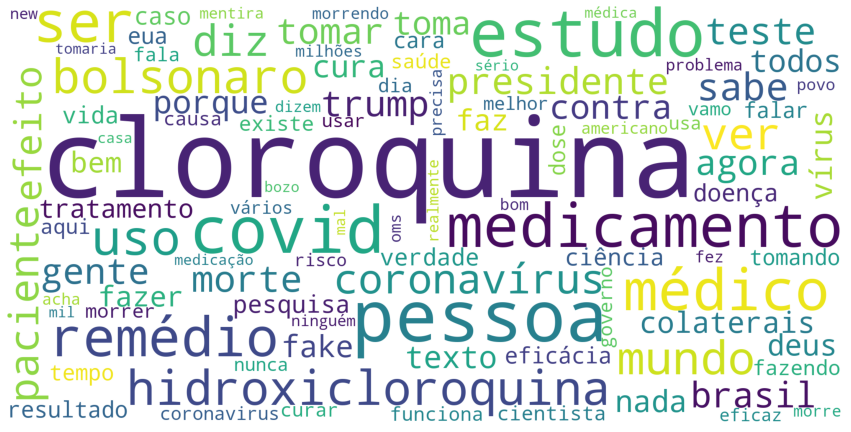

In [41]:
# nuvem de palavras dos usuários contra o uso da cloroquina no tratamento da Covid-19
wordcloudNeg = WordCloud(
    stopwords = list(STOPWORDS) + stopwords.words('portuguese') + stop,
    background_color = 'white',
    height = 1000,
    width = 2000,
    relative_scaling = 0.7,
    max_words = 100,
    collocations = False, # isso separa n-gramas
    random_state = 1
    ).generate(cloudNeg)

plt.figure(figsize=(15,10))
plt.imshow(wordcloudNeg)
plt.axis("off")
plt.show()

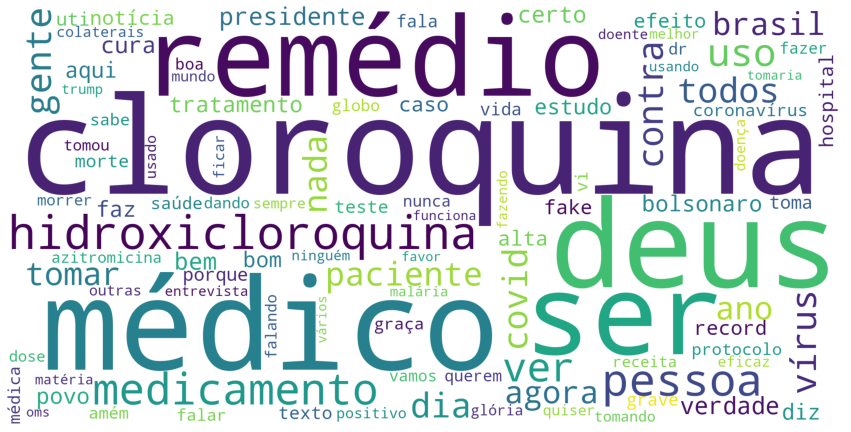

In [42]:
# nuvem de palavras dos usuários a favor do uso da cloroquina no tratamento da Covid-19
wordcloudPos = WordCloud(
    stopwords = list(STOPWORDS) + stopwords.words('portuguese') + stop,
    background_color = 'white',
    height = 1000,
    width = 2000,
    relative_scaling = 0.7,
    max_words = 100,
    collocations = False, # isso separa n-gramas
    random_state = 1
    ).generate(cloudPos)

plt.figure(figsize=(15,10))
plt.imshow(wordcloudPos)
plt.axis("off")
plt.show()

## Referência bibliográfica
MOHAMMAD, Saif M.; SOBHANI, Parinaz; KIRITCHENKO, Svetlana. "Stance and Sentiment in Tweets". In: **ACM Transactions on Embedded Computing Systems**. V. 0. N. 0. 2016. Disponível em: <https://arxiv.org/pdf/1605.01655.pdf>. Acesso em 18 de setembro de 2020.